In [7]:
#importing the basic libraries
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist #MNist : digit recognition: fashion MNist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D

In [8]:
%matplotlib inline

In [9]:
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


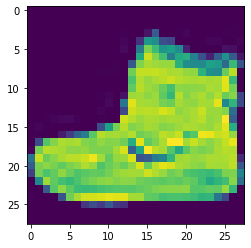

In [10]:
plt.imshow(train_x[0])

In [11]:
train_y[0]

9

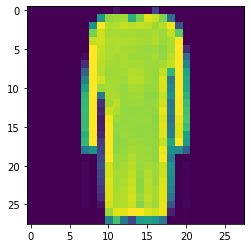

In [12]:
plt.imshow(train_x[25])

In [13]:
train_y[25]

3

In [14]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


data preprocessing

In [15]:
#each image is in 2D i.e., 28x28
#beacause of convolution, we are increasing the depth of image. that means 3rd dim is required.
train_x=train_x.reshape(-1,28,28,1) # 28x28 --> 28x28x1
test_x=test_x.reshape(-1,28,28,1)

In [16]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [17]:
#0-->255
#0-->1
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')
train_x=train_x/255
test_x=test_x/255

In [ ]:
train_x[0]

In [19]:
train_y_one_hot=to_categorical(train_y)
test_y_one_hot=to_categorical(test_y)

In [20]:
print(train_y[25])
print(train_y_one_hot[25])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


model training

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_x,valid_x,train_label,valid_label=train_test_split(train_x,train_y_one_hot,test_size=0.2)

In [23]:
import keras
#from keras.model import sequential ,input , model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import keras.models as models

In [24]:
num_classes=10
epochs=20
batch_size=64

In [25]:
model=tf.keras.Sequential()

In [26]:
#input layer 1
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28,28,1),padding='same'))  #convolution
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
model.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))#pooling


In [27]:
#hidden layer 2
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='linear',padding='same'))  #convolution
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
model.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))#pooling


In [28]:
#hidden layer 3
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='linear',padding='same'))  #convolution
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
model.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))#pooling

In [29]:
model.add(tf.keras.layers.Flatten())

In [30]:
#output layer
model.add(tf.keras.layers.Dense(128,activation='linear'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [31]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [33]:
model_trained=model.fit(train_x,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_x,valid_label))

Epoch 1/20
750/750 [==============================] - 109s 144ms/step - loss: 0.4650 - accuracy: 0.8305 - val_loss: 0.3129 - val_accuracy: 0.8846
Epoch 2/20
750/750 [==============================] - 107s 143ms/step - loss: 0.2869 - accuracy: 0.8964 - val_loss: 0.2743 - val_accuracy: 0.8977
Epoch 3/20
750/750 [==============================] - 105s 140ms/step - loss: 0.2404 - accuracy: 0.9110 - val_loss: 0.2732 - val_accuracy: 0.8999
Epoch 4/20
750/750 [==============================] - 106s 141ms/step - loss: 0.2069 - accuracy: 0.9241 - val_loss: 0.2321 - val_accuracy: 0.9152
Epoch 5/20
750/750 [==============================] - 102s 136ms/step - loss: 0.1812 - accuracy: 0.9336 - val_loss: 0.2290 - val_accuracy: 0.9170
Epoch 6/20
750/750 [==============================] - 103s 137ms/step - loss: 0.1597 - accuracy: 0.9408 - val_loss: 0.2256 - val_accuracy: 0.9193
Epoch 7/20
750/750 [==============================] - 100s 134ms/step - loss: 0.1372 - accuracy: 0.9474 - val_loss: 0.2272 -

In [34]:
#model evalution
evalution = model.evaluate(test_x,test_y_one_hot)

313/313 [==============================] - 7s 22ms/step - loss: 0.4732 - accuracy: 0.9158


In [35]:
print("loss",evalution[0])
print("accuracy",evalution[1])

loss 0.4731910526752472
accuracy 0.9157999753952026


In [36]:
model_trained.history

{'loss': [0.46501314640045166,
  0.28686317801475525,
  0.24039070308208466,
  0.20694313943386078,
  0.18119512498378754,
  0.15968798100948334,
  0.13715004920959473,
  0.11928978562355042,
  0.1030019149184227,
  0.08672483265399933,
  0.07519125938415527,
  0.06289955973625183,
  0.05355168506503105,
  0.04926108941435814,
  0.043718744069337845,
  0.03997117280960083,
  0.03865450248122215,
  0.028797876089811325,
  0.03557410463690758,
  0.025401121005415916],
 'accuracy': [0.8304791450500488,
  0.8964375257492065,
  0.9110000133514404,
  0.9240833520889282,
  0.9335625171661377,
  0.940791666507721,
  0.9473749995231628,
  0.9551874995231628,
  0.9611666798591614,
  0.9670416712760925,
  0.9720208048820496,
  0.9758958220481873,
  0.9799166917800903,
  0.9815624952316284,
  0.9835625290870667,
  0.9855208396911621,
  0.9855208396911621,
  0.989145815372467,
  0.9870208501815796,
  0.9913958311080933],
 'val_loss': [0.312949538230896,
  0.27430814504623413,
  0.27320176362991333,

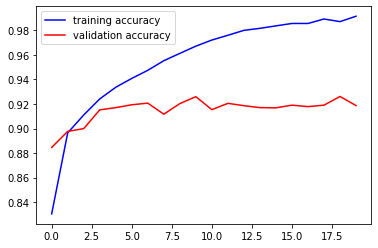

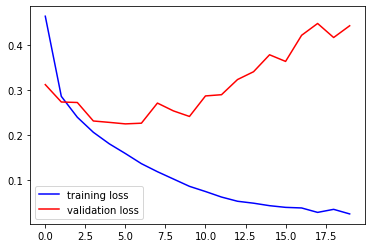

In [38]:
#ploting the graph of evaluation history
val_accuracy=model_trained.history['val_accuracy']
accuracy=model_trained.history['accuracy']
val_loss=model_trained.history['val_loss']
loss=model_trained.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'b',label="training accuracy")
plt.plot(epochs,val_accuracy,'r',label="validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label="training loss")
plt.plot(epochs,val_loss,'r',label="validation loss")
plt.legend()
plt.show()


In [39]:
#model modified

In [40]:
mode_modified=tf.keras.Sequential()

In [41]:
#input layer 1
mode_modified.add(tf.keras.layers.Conv2D(32,(3,3),activation='linear',input_shape=(28,28,1),padding='same'))  #convolution
mode_modified.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
mode_modified.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))#pooling
mode_modified.add(tf.keras.layers.Dropout(0.25))

In [42]:
#hidden layer 2
mode_modified.add(tf.keras.layers.Conv2D(64,(3,3),activation='linear',padding='same'))  #convolution
mode_modified.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
mode_modified.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))#pooling
mode_modified.add(tf.keras.layers.Dropout(0.25))


In [43]:
#hidden layer 3
mode_modified.add(tf.keras.layers.Conv2D(128,(3,3),activation='linear',padding='same'))  #convolution
mode_modified.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
mode_modified.add(tf.keras.layers.MaxPooling2D((2,2),padding='same'))#pooling
mode_modified.add(tf.keras.layers.Dropout(0.25))

In [44]:
mode_modified.add(tf.keras.layers.Flatten())

In [45]:
#output layer
mode_modified.add(tf.keras.layers.Dense(128,activation='linear'))
mode_modified.add(tf.keras.layers.LeakyReLU(alpha=0.1))  #activation
mode_modified.add(tf.keras.layers.Dropout(0.3))
mode_modified.add(tf.keras.layers.Dense(num_classes,activation='softmax'))

In [46]:
mode_modified.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [47]:
mode_modified.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [48]:
model_trained=mode_modified.fit(train_x,train_label,batch_size=64,epochs=20,verbose=1,validation_data=(valid_x,valid_label))

Epoch 1/20
750/750 [==============================] - 106s 140ms/step - loss: 0.5908 - accuracy: 0.7796 - val_loss: 0.3595 - val_accuracy: 0.8658
Epoch 2/20
750/750 [==============================] - 107s 142ms/step - loss: 0.3667 - accuracy: 0.8664 - val_loss: 0.3003 - val_accuracy: 0.8885
Epoch 3/20
750/750 [==============================] - 105s 140ms/step - loss: 0.3175 - accuracy: 0.8849 - val_loss: 0.2831 - val_accuracy: 0.8934
Epoch 4/20
750/750 [==============================] - 106s 141ms/step - loss: 0.2883 - accuracy: 0.8940 - val_loss: 0.2568 - val_accuracy: 0.9018
Epoch 5/20
750/750 [==============================] - 104s 139ms/step - loss: 0.2679 - accuracy: 0.9017 - val_loss: 0.2512 - val_accuracy: 0.9032
Epoch 6/20
750/750 [==============================] - 106s 141ms/step - loss: 0.2539 - accuracy: 0.9061 - val_loss: 0.2364 - val_accuracy: 0.9103
Epoch 7/20
750/750 [==============================] - 104s 138ms/step - loss: 0.2402 - accuracy: 0.9110 - val_loss: 0.2338 -

In [49]:
#mode_modified evalution
evalution = mode_modified.evaluate(test_x,test_y_one_hot)

313/313 [==============================] - 6s 20ms/step - loss: 0.2250 - accuracy: 0.9194


In [50]:
print("loss",evalution[0])
print("accuracy",evalution[1])

loss 0.22504667937755585
accuracy 0.9193999767303467


In [51]:
model_trained.history

{'loss': [0.590807318687439,
  0.3667050302028656,
  0.31748807430267334,
  0.2883177399635315,
  0.26792189478874207,
  0.253927618265152,
  0.24016684293746948,
  0.23149554431438446,
  0.22364965081214905,
  0.2158193141222,
  0.20776072144508362,
  0.2048817276954651,
  0.1986302137374878,
  0.19545383751392365,
  0.1912790685892105,
  0.18761327862739563,
  0.18186327815055847,
  0.17961494624614716,
  0.18039624392986298,
  0.17522647976875305],
 'accuracy': [0.7796458601951599,
  0.8663750290870667,
  0.8848958611488342,
  0.8940208554267883,
  0.901729166507721,
  0.9061458110809326,
  0.9110416769981384,
  0.9134791493415833,
  0.9176250100135803,
  0.9195833206176758,
  0.9214375019073486,
  0.9231458306312561,
  0.9235625267028809,
  0.9271458387374878,
  0.9274374842643738,
  0.9309999942779541,
  0.9320833086967468,
  0.9308124780654907,
  0.9310833215713501,
  0.9338958263397217],
 'val_loss': [0.3594796657562256,
  0.30029159784317017,
  0.2830786108970642,
  0.256799340

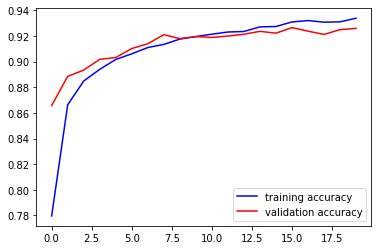

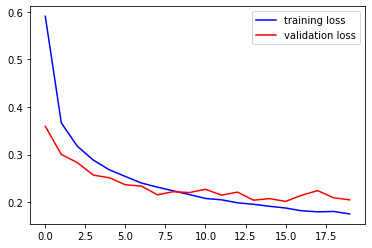

In [52]:
val_accuracy=model_trained.history['val_accuracy']
accuracy=model_trained.history['accuracy']
val_loss=model_trained.history['val_loss']
loss=model_trained.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'b',label="training accuracy")
plt.plot(epochs,val_accuracy,'r',label="validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label="training loss")
plt.plot(epochs,val_loss,'r',label="validation loss")
plt.legend()
plt.show()


In [57]:
predicted_classes = mode_modified.predict(test_x)

313/313 [==============================] - 8s 24ms/step


In [58]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

Found 9165 correct labels


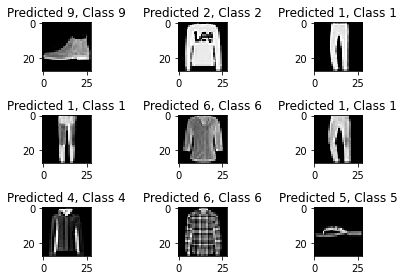

In [59]:
correct = np.where(predicted_classes==test_y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_y[correct]))
    plt.tight_layout()

Found 835 incorrect labels


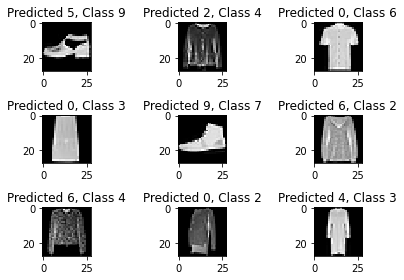

In [60]:
incorrect = np.where(predicted_classes!=test_y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_x[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_y[incorrect]))
    plt.tight_layout()

In [61]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.90      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.91      0.86      0.88      1000
     Class 3       0.94      0.92      0.93      1000
     Class 4       0.89      0.83      0.86      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.76      0.77      0.77      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.96      0.97      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

